In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-5tj9ehjj
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-5tj9ehjj
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=173445 sha256=f73b628b808eb452803ec08852d3b76efc21055c8237dcbf9c0d672773c66f61
  Stored in directory: /tmp/pip-ephem-wheel-cache-kbuzmijc/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
from sklearn.decomposition import PCA
from sklearn import metrics

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [ ]:
from sklearn.utils import resample
from matplotlib import pyplot
from numpy import mean
from numpy import std
from numpy import array

In [ ]:
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import os
from datetime import datetime

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [ ]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [ ]:
def tie_dataset(feature, label, timestep = 24, want_period = 1):
    feature_list = []
    label_list = []

    for i in range(timestep, len(feature)-want_period):
        feature_list.append(feature[i-timestep:i])
        label_list.append(label[i:i+want_period]) 
        #label_list.append(label[i])
    return np.array(feature_list), np.array(label_list)

In [ ]:
def generate_model_lstm(trainX, trainy):
    
    model = Sequential()
    model.add(LSTM(64, activation='tanh', return_sequences=True))
    model.add(LSTM(64, activation='tanh'))
    model.add(Dense(1))
   
    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
    
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    model.fit(trainX, trainy, epochs=30, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])
    
    return model




def generate_model_cnn(trainX, trainy):   
    
    model = Sequential()
    model.add(Conv1D(filters=4, kernel_size= 1, activation='relu'))
    model.add(MaxPooling1D(pool_size=2)) # 데이터 크기 1/2로 줄여줌
    #model.add(Flatten()) # 다차원 배열을 1차원으로 바꿔줌

    #model.add(LSTM(64, activation='relu', return_sequences=True))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    # trainX = trainX.reshape(trainX.shape[0], 4, 1 ,1)
    
    model.fit(trainX, trainy, epochs=30, validation_split= 0.2, verbose=0,
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])

    return model 



 
def generate_model_gru(trainX, trainy):   

    model = Sequential()
    #model.add(GRU(64, activation='tanh', return_sequences=True))
    model.add(GRU(64, activation='tanh'))
    model.add(Dense(1))
   
    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
    
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    model.fit(trainX, trainy, epochs=30, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])
    return model



def generate_model_mlp(trainX, trainy):   

    model = Sequential()
    model.add(Dense(64, activation='tanh'))
    #model.add(Dense(64, activation='tanh'))
    model.add(Dense(1))
   
    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
    
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    model.fit(trainX, trainy, epochs=250, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])
    
    return model

def train_model(model, trainX, trainy):

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    model.fit(trainX, trainy, epochs=20, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])
    
    return model

In [ ]:
df = pd.read_csv(os.path.join('/content/gdrive/My Drive/Colab Notebooks', 'train_hourly.csv'), encoding='utf8')
df_forecast = pd.read_csv(os.path.join('/content/gdrive/My Drive/Colab Notebooks', 'test_hourly.csv'), encoding='cp949')

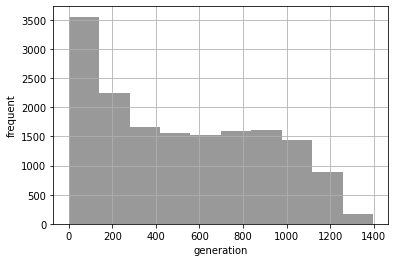

In [ ]:
frq, bins, fig = plt.hist(df["pow_gen"], bins=10, alpha=.8, color='grey')
plt.ylabel("frequent")
plt.xlabel("generation")
plt.grid()
plt.show()

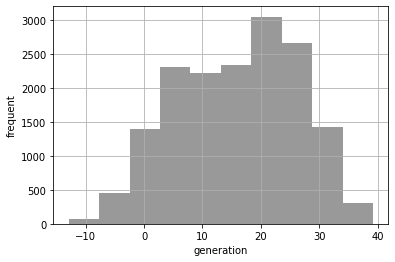

In [ ]:
frq, bins, fig = plt.hist(df["temperature"], bins=10, alpha=.8, color='grey')
plt.ylabel("frequent")
plt.xlabel("generation")
plt.grid()
plt.show()

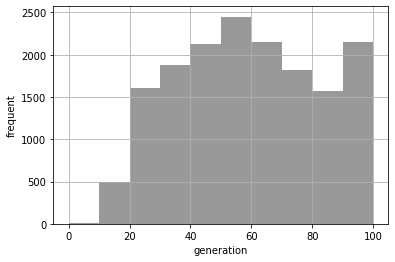

In [ ]:
frq, bins, fig = plt.hist(df["humidity"], bins=10, alpha=.8, color='grey')
plt.ylabel("frequent")
plt.xlabel("generation")
plt.grid()
plt.show()

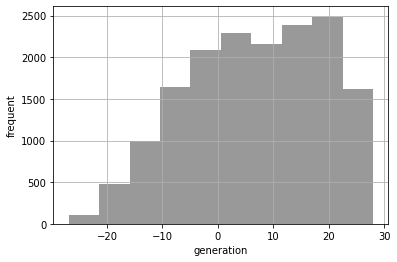

In [ ]:
frq, bins, fig = plt.hist(df["dew_point"], bins=10, alpha=.8, color='grey')
plt.ylabel("frequent")
plt.xlabel("generation")
plt.grid()
plt.show()

In [ ]:
# dataset1 = df[["년_월_일_시"]] 
# df = df.drop("일자", axis=1) 
# df = df.set_index("년_월_일_시", drop=True)


In [ ]:
df

,year,month,day,hour,temperature,humidity,dew_point,sol_rad,cloud,pow_gen
0,2016,12,13,14,4.3,77,0.6,100.000,0,140.631
1,2016,12,13,15,4.3,80,1.1,72.222,0,85.793
2,2016,12,13,16,3.8,80,0.6,55.556,0,32.590
3,2016,12,13,17,3.4,80,0.2,13.889,0,0.154
4,2016,12,14,7,0.0,70,-4.8,0.000,0,7.275
...,...,...,...,...,...,...,...,...,...,...
16249,2020,12,31,13,1.6,43,-9.6,383.333,7,992.598
16250,2020,12,31,14,2.0,44,-9.0,425.000,7,865.707
16251,2020,12,31,15,2.8,44,-8.2,236.111,8,624.352
16252,2020,12,31,16,2.6,44,-8.4,244.444,6,224.034


In [ ]:
#Split dataset into training and testing set
train_size = int(len(df)*0.7)
test_size = int(len(df)*0.3)
 
# train_dataset = df[['month', 'day', 'hour', 'temperature', 'humidity', 'dew_point', 'sol_rad', 'cloud', 'pow_gen']]                      #시 발전량 기온 습도 이슬점온도 일사량 전운량
# test_dataset = df_forecast[['month', 'day', 'hour', 'temperature', 'humidity', 'dew_point', 'sol_rad', 'cloud', 'pow_gen']]

train_dataset = df.iloc[:train_size, [1,2,3,4,5,6,7,8,9]]
test_dataset = df.iloc[train_size : train_size+test_size, [1,2,3,4,5,6,7,8,9]] 

In [ ]:
all_train = pd.concat([train_dataset, test_dataset], axis=0)

In [ ]:
train_stats = all_train.describe()
train_stats.pop("pow_gen")
train_stats = train_stats.transpose()

In [ ]:
train_labels = train_dataset.pop('pow_gen')
test_labels = test_dataset.pop('pow_gen')

In [ ]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
    
train_final= normed_train_data.values
test_final = normed_test_data.values
target=train_labels.values
test_target=test_labels.values


In [ ]:
normed_train_data

,month,day,hour,temperature,humidity,dew_point,sol_rad,cloud
0,1.553954,-0.318802,0.632615,-1.141028,0.789066,-0.498794,-0.820361,-0.774454
1,1.553954,-0.318802,0.948748,-1.141028,0.917647,-0.457611,-0.931840,-0.774454
2,1.553954,-0.318802,1.264880,-1.190005,0.917647,-0.498794,-0.998723,-0.774454
3,1.553954,-0.318802,1.581013,-1.229186,0.917647,-0.531740,-1.165941,-0.774454
4,1.553954,-0.205146,-1.580312,-1.562227,0.489042,-0.943568,-1.221680,-0.774454
...,...,...,...,...,...,...,...,...
11372,0.979592,-0.091489,-0.948047,-0.592489,1.731997,0.250733,-0.352155,-0.270351
11373,0.979592,-0.091489,-0.631915,-0.141904,1.346253,0.506066,0.405892,0.485804
11374,0.979592,-0.091489,-0.315782,0.112774,0.446181,0.382518,0.751471,0.737855
11375,0.979592,-0.091489,0.000350,0.279295,-0.111005,0.258969,1.063605,0.485804


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(train_final)
    
pca_train = pca.transform(train_final)
pca_test = pca.transform(test_final)


In [ ]:
X_train, Y_train = tie_dataset(pca_train, target)
X_test, Y_test = tie_dataset(pca_test, test_target)

testX_mlp = pca_test[-6476:]
testy_mlp = test_target

X_train.shape, Y_train.shape, pca_test.shape

((11352, 24, 6), (11352, 1), (4876, 6))

In [ ]:
# for train_ix, test_ix in kfold.split(X):            for cross validation
# 	# select samples
# 	trainX, trainy = X[train_ix], y[train_ix]
# 	testX, testy = X[test_ix], y[test_ix]
# 	# evaluate model
# 	model, test_acc = evaluate_model(trainX, trainy, testX, testy)
# 	print('>%.3f' % test_acc)
# 	scores.append(test_acc)
# 	members.append(model)  
 

In [ ]:
# X_train = np.expand_dims(pca_train, axis=2)
# X_test = np.expand_dims(pca_test, axis=2)


In [ ]:
n_splits = 10
members_lstm = list()
members_cnn = list()
members_gru = list()
members_mlp = list()
members = list()
members_ret = list()

# model = generate_model_lstm(X_train, Y_train)
# members.append(model)


# model = generate_model_cnn(X_train, Y_train)
# members.append(model)


# model = generate_model_gru(X_train, Y_train)
# members.append(model)


# model = generate_model_mlp(pca_train, target)
# members.append(model)

# members = [CL,LT,GR,ML]

for _ in range(n_splits):
    model = generate_model_lstm(X_train, Y_train)
    members.append(model)

    


Epoch: 0, loss:387741.4062,  mae:496.2385,  mse:387741.4062,  val_loss:434344.6562,  val_mae:546.9984,  val_mse:434344.6562,  
..............................
Epoch: 0, loss:386241.1562,  mae:495.0824,  mse:386241.1562,  val_loss:432283.5000,  val_mae:545.1622,  val_mse:432283.5000,  
..............................
Epoch: 0, loss:386552.1875,  mae:495.3596,  mse:386552.1875,  val_loss:432394.2500,  val_mae:545.2612,  val_mse:432394.2500,  
..............................
Epoch: 0, loss:387062.0938,  mae:495.7478,  mse:387062.0938,  val_loss:433119.7188,  val_mae:545.9077,  val_mse:433119.7188,  
..............................
Epoch: 0, loss:386585.1875,  mae:495.4086,  mse:386585.1875,  val_loss:432726.7812,  val_mae:545.5582,  val_mse:432726.7812,  
..............................
Epoch: 0, loss:387581.7500,  mae:496.1797,  mse:387581.7500,  val_loss:434064.4062,  val_mae:546.7497,  val_mse:434064.4062,  
..............................
Epoch: 0, loss:385353.5938,  mae:494.3490,  mse:385

In [ ]:
# def load_all_models(n_models):
# 	all_models = list()
# 	for i in range(n_models):
# 		# define filename for this ensemble
# 		filename = '/content/gdrive/My Drive/Colab Notebooks/model_' + str(i + 1) + '.h5'
# 		# load model from file
# 		model = tf.keras.models.load_model(filename)
# 		# add to list of members
# 		all_models.append(model)
# 		print('>loaded %s' % filename)
# 	return all_models

In [ ]:
# members = load_all_models(4)
# print('Loaded %d models' % len(members))

In [ ]:
cnn_mse, gru_mse, mlp_mse = list(), list(), list()
single_mse, ensemble_mse = list(), list()
single_pred = list()

for i in range(1, n_splits):
  
    subset = members[:i]
    yhats = [model.predict(X_test) for model in subset]
    yhats = array(yhats)
    yhats[yhats<0] = 0
    averaged = np.average(yhats, axis=0)
    ensemble = mean_squared_error(Y_test,averaged,squared=False)

    *_, y1 = [members[i-1].predict(X_test)]
    y1[y1<0] = 0
    single =  mean_squared_error(Y_test,y1,squared=False)

        #X_test_cnn = X_test.reshape(X_test.shape[0], 4,1,1)
        # *_, y2 = [members_cnn[i-1].predict(X_test)]
        # y2[y2<0] = 0
        # cnn_lstm = mean_squared_error(Y_test, y2, squared=False) 

        # *_, y3 = [members_gru[i-1].predict(X_test)]
        # y3[y3<0] = 0
        # single_gru = mean_squared_error(Y_test, y3, squared=False) 
    
        # *_, y4 = [members_mlp[i-1].predict(X_test)]
        # y4[y4<0] = 0
        # single_mlp = mean_squared_error(Y_test, y4, squared=False) 

        #print('> %d: LSTM=%.3f, cnn_lstm=%.3f, ensemble=%.3f' % (i, single_lstm, cnn_lstm, ensemble))
    print('> %d: Single=%.3f, Ensemble=%.3f' % (i, single, ensemble))
    single_mse.append(single)
    # cnn_mse.append(cnn_lstm)
    ensemble_mse.append(ensemble) 
    single_pred.append(y1)
    # gru_mse.append(single_gru)
    # mlp_mse.append(single_mlp)

# y1 = members[3].predict(testX_mlp)
# y1[y1<0] = 0
# single = mean_squared_error(Y_test, y1, squared=False)
# single_pred.append(y1)
# single_pred = array(single_pred)
# averaged = np.average(single_pred, axis=0)
# ensemble = mean_squared_error(Y_test, averaged, squared=False)

# print('> %d: Single=%.3f, Ensemble=%.3f' % (4, single, ensemble))
# single_mse.append(single)
# ensemble_mse.append(ensemble)


> 1: Single=381.153, Ensemble=381.153
> 2: Single=380.358, Ensemble=380.748
> 3: Single=385.039, Ensemble=381.839
> 4: Single=307.846, Ensemble=355.932
> 5: Single=380.375, Ensemble=360.317
> 6: Single=380.609, Ensemble=363.442
> 7: Single=351.863, Ensemble=359.420
> 8: Single=380.705, Ensemble=361.796
> 9: Single=381.105, Ensemble=363.767


In [ ]:
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 18,
    'figure.figsize': (12, 5),
    'axes.grid' : True, 'axes.grid.axis': 'y'
})

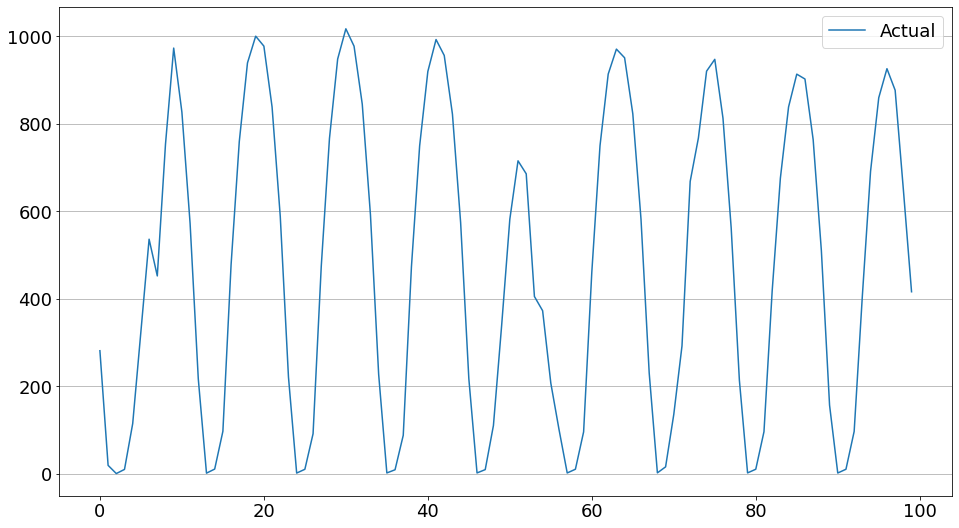

In [ ]:
plt.figure(figsize=(16, 9))

start = -200
end = -100
forprint_test = test_target[start:end]
# forprint_pred_ensemble = averaged[start:end]

# forprint_pred_lstm = single_ret[0][start:end]
# forprint_pred_cnn = single_ret[1][start:end]
# forprint_pred_gru = single_ret[2][start:end]
# forprint_pred_mlp = single_ret[3][start:end]


#pd.DataFrame({'Real':test_label,'Predicted':pred}).plot()
plt.plot(forprint_test,label='Actual')
# plt.plot(forprint_pred_ensemble, label='Ensemble LSTM (Ours)')
# plt.plot(forprint_pred_lstm, label='LSTM')
# plt.plot(forprint_pred_cnn, label='CNN + LSTM')
# plt.plot(forprint_pred_gru, label='GRU')
# plt.plot(forprint_pred_mlp, label='MLP')
# plt.plot(forprint_pred_lstm, label='LSTM')
# plt.plot(forprint_pred_cnn, label='LSTM + CNN')
# plt.plot(forprint_pred_gru, label='GRU')
# plt.plot(forprint_pred_mlp, label='MLP')
#plt.xticks(np.arange(0, 168, 24), labels=['2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08', '2020-02-09', '2021-02-10', '2021-02-11', '2021-02-12'])
plt.legend()
plt.show()

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


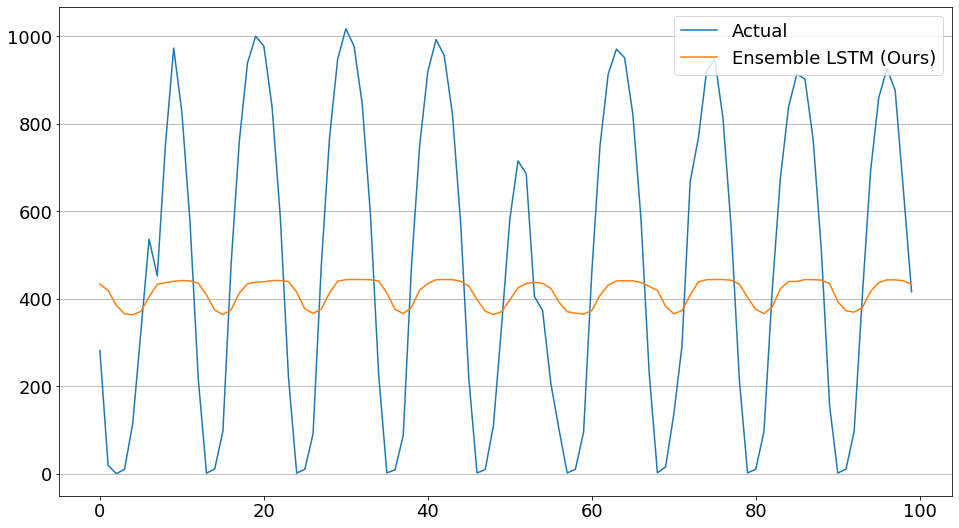

In [ ]:
plt.figure(figsize=(16, 9))

start = -200
end = -100
forprint_test = test_target[start:end]
forprint_pred_ensemble = averaged[start:end]

# forprint_pred_lstm = single_ret[0][start:end]
# forprint_pred_cnn = single_ret[1][start:end]
# forprint_pred_gru = single_ret[2][start:end]
# forprint_pred_mlp = single_ret[3][start:end]


#pd.DataFrame({'Real':test_label,'Predicted':pred}).plot()
plt.plot(forprint_test,label='Actual')
plt.plot(forprint_pred_ensemble, label='Ensemble LSTM (Ours)')
# plt.plot(forprint_pred_lstm, label='LSTM')
# plt.plot(forprint_pred_cnn, label='CNN + LSTM')
# plt.plot(forprint_pred_gru, label='GRU')
# plt.plot(forprint_pred_mlp, label='MLP')
# plt.plot(forprint_pred_lstm, label='LSTM')
# plt.plot(forprint_pred_cnn, label='LSTM + CNN')
# plt.plot(forprint_pred_gru, label='GRU')
# plt.plot(forprint_pred_mlp, label='MLP')
#plt.xticks(np.arange(0, 168, 24), labels=['2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08', '2020-02-09', '2021-02-10', '2021-02-11', '2021-02-12'])
plt.legend()
plt.show()

In [ ]:
single_mse, ensemble_mse

([381.15303238149215,
  380.3584283148475,
  385.0386545881303,
  307.84559209016726,
  380.3745538220255,
  380.6090912673219,
  351.8634396872962,
  380.7047094199733,
  381.10451771561816],
 [381.15303238149215,
  380.7481424275742,
  381.83927026029596,
  355.93237531460784,
  360.3173151185133,
  363.4417671875894,
  359.41971135348734,
  361.79571647623203,
  363.76734611934614])

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


RMSE Single Learners 369.895 (23.823)
RMSE Ensemble Learners 367.602 (9.894)


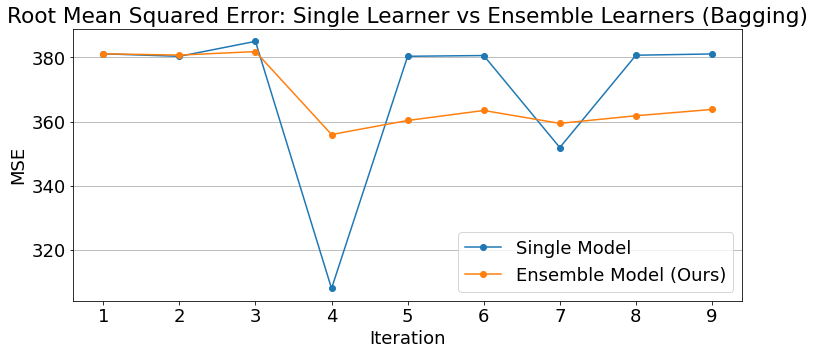

In [ ]:
# plot score vs number of ensemble members
print('RMSE Single Learners %.3f (%.3f)' % (mean(single_mse), std(single_mse)))
#print('RMSE Cnn_lstm Learners %.3f (%.3f)' % (mean(cnn_mse), std(cnn_mse)))
print('RMSE Ensemble Learners %.3f (%.3f)' % (mean(ensemble_mse), std(ensemble_mse)))
#print('RMSE GRU Learners %.3f (%.3f)' % (mean(gru_mse), std(gru_mse)))

x_axis = [i for i in range(1, n_splits)]
pyplot.plot(x_axis, single_mse, marker='o', label='Single Model')
#pyplot.plot(x_axis, cnn_mse, marker='o', label='LSTM + CNN')
pyplot.plot(x_axis, ensemble_mse, marker='o', label='Ensemble Model (Ours)')
#pyplot.plot(x_axis, gru_mse, marker='o', label='GRU')
#pyplot.plot(x_axis, gru_mse, marker='o', label='GRU')
plt.title("Root Mean Squared Error: Single Learner vs Ensemble Learners (Bagging)")
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
pyplot.show()

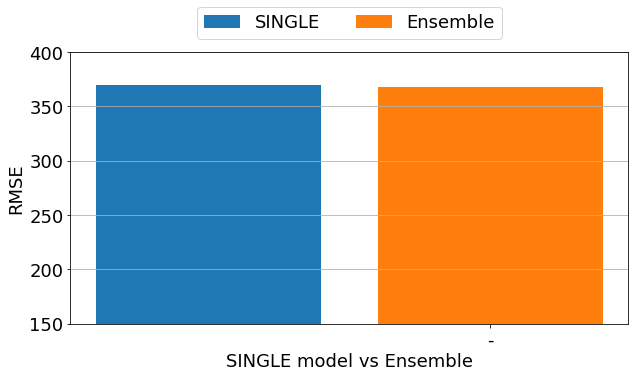

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))

ax.set_ylabel('RMSE')
ax.set_xlabel('SINGLE model vs Ensemble')
width = 0.25
x_axis = np.arange(1)

rects1 = ax.bar(x_axis-width, mean(single_mse), 0.2, label='SINGLE')
rects2 = ax.bar(x_axis, mean(ensemble_mse), 0.2, label='Ensemble')
#rects3 = ax.bar(x_axis+width, mean(single_gru), 0.2 , label='GRU')



ax.set_ylim(150, 400)
ax.set_xticks(x_axis)
ax.set_xticklabels('-')

ax.legend(loc=9, ncol=3, bbox_to_anchor=(0.5, 1.2))



print()

In [ ]:
# single_mae, ensemble_mae = list(), list()
# for i in range(1, n_splits+1):
#     subset = members[:i]
#     yhats = [model.predict(X_test) for model in subset]
#     yhats = array(yhats)
#     averaged = np.average(yhats, axis=0)
#     ensemble = mean_absolute_error(test_target,averaged)
    
#     *_, y1 = [members[i-1].predict(X_test)]
#     single =  mean_absolute_error(test_target,y1)
#     print('> %d: single=%.3f, ensemble=%.3f' % (i, single, ensemble))
#     single_mae.append(single)
#     ensemble_mae.append(ensemble)
   

In [ ]:
# # plot score vs number of ensemble members
# print('MAE Single Learners %.3f (%.3f)' % (mean(single_mae), std(single_mae)))
# print('MAE Ensemble Learners %.3f (%.3f)' % (mean(ensemble_mae), std(ensemble_mae)))
# x_axis = [i for i in range(1, n_splits+1)]
# pyplot.plot(x_axis, single_mae, marker='o', linestyle='None')
# pyplot.plot(x_axis, ensemble_mae, marker='o')
# plt.title("Mean Absolute Error: Single Learner vs Ensemble Learners (Bagging)")
# pyplot.show()

In [ ]:
# single_maxe, ensemble_maxe = list(), list()
# for i in range(1, n_splits+1):
#     subset = members[:i]
#     yhats = [model.predict(X_test) for model in subset]
#     yhats = array(yhats)
#     averaged = np.average(yhats, axis=0)
#     ensemble = max_error(test_target,averaged)
    
#     *_, y1 = [members[i-1].predict(X_test)]
#     single =  max_error(test_target,y1)
#     print('> %d: single=%.3f, ensemble=%.3f' % (i, single, ensemble))
#     single_maxe.append(single)
#     ensemble_maxe.append(ensemble)
   

In [ ]:
# # plot score vs number of ensemble members
# print('Max Error Single Learners %.3f (%.3f)' % (mean(single_maxe), std(single_maxe)))
# print('Max Error Ensemble Learners %.3f (%.3f)' % (mean(ensemble_maxe), std(ensemble_maxe)))
# x_axis = [i for i in range(1, n_splits+1)]
# pyplot.plot(x_axis, single_maxe, marker='o', linestyle='None')
# pyplot.plot(x_axis, ensemble_maxe, marker='o')
# plt.title("Max Error: Single Learner vs Ensemble Learners (Bagging)")
# pyplot.show()    

In [ ]:
# plt.figure(figsize=(16, 9))

# forprint_test = averaged[-168:]
# forprint_pred = pred[-168:]

# #pd.DataFrame({'Real':test_label,'Predicted':pred}).plot()
# plt.plot(forprint_test,label='actual')
# plt.plot(forprint_pred, label='prediction')

# plt.xticks(np.arange(0, 168, 24), labels=['2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08', '2020-02-09', '2021-02-10', '2021-02-11', '2021-02-12'])
# plt.legend()
# plt.show()

In [ ]:
# single_evs, ensemble_evs = list(), list()
# for i in range(1, n_splits+1):
#     subset = members[:i]
#     yhats = [model.predict(X_test) for model in subset]
#     yhats = array(yhats)
#     averaged = np.average(yhats, axis=0)
#     ensemble = explained_variance_score(test_target,averaged)
    
#     *_, y1 = [members[i-1].predict(X_test)]
#     single =  explained_variance_score(test_target,y1)
#     print('> %d: single=%.3f, ensemble=%.3f' % (i, single, ensemble))
#     single_evs.append(single)
#     ensemble_evs.append(ensemble)
   

In [ ]:
# plot score vs number of ensemble members
# print('Explained Variance Score Single Learners %.3f (%.3f)' % (mean(single_evs), std(single_evs)))
# print('Explained Variance Score Ensemble Learners %.3f (%.3f)' % (mean(ensemble_evs), std(ensemble_evs)))
# x_axis = [i for i in range(1, n_splits+1)]
# pyplot.plot(x_axis, single_evs, marker='o', linestyle='None')
# pyplot.plot(x_axis, ensemble_evs, marker='o')
# plt.title("Explained Variance Score Single Learners: Single Learner vs Ensemble Learners (Bagging)")
# pyplot.show()    